In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install scanpy
!pip install matplotlib==3.1.3
!pip install --user scikit-misc
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 88 kB 4.9 MB/s 
     |████████████████████████████████| 11.2 MB 36.2 MB/s 
     |████████████████████████████████| 930 kB 41.1 MB/s 
     |████████████████████████████████| 1.1 MB 37.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ab82351848f7f1afebacfafa4d87c327abdc76e3cb26a8a3330af5bef0d95a3e
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=d70d433a6da7f6e949dd72934b0477486ef2e58cc3b70f52ca95e554ba64a91b
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.5 kB/s 
     |████████████████████████████████| 1.6 MB 39.5 MB/s 
     |████████████████████████████████| 438 kB 44.4 MB/s 
     |████████████████████████████████| 5.8 MB 25.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstal

In [3]:
import numpy as np 
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
import scipy
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

Pancreas_adata = sc.read_text("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_LogX_CellCycleRegressedOut.txt", delimiter = '\t', first_column_names=None)
sc.pp.scale(Pancreas_adata)
Pancreas_adata

ModuleNotFoundError: ignored

In [ ]:
PancreasMetadata = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/PancreasMetadata.csv")
Pancreas_adata.obs['Cell Type'] = PancreasMetadata['Cell type'].values
Pancreas_adata.obs['Cell Type'].unique()

array(['γ', 'α', 'β', 'acinar', 'ε', 'unclassified exocrine', 'ductal',
       'δ', 'unclassified endocrine', 'endothelial', 'co-expression',
       'PSC', 'mast', 'MHC'], dtype=object)

In [ ]:
PancreasCellID = []
for item in PancreasMetadata['Cell ID'].values:
  PancreasCellID.append(item)
Pancreas_adata.obs_names = PancreasCellID
Pancreas_adata.obs_names

Index(['HP1502401_H13', 'HP1502401_J14', 'HP1502401_B14', 'HP1502401_A14',
       'HP1502401_C14', 'HP1502401_G14', 'HP1502401_E14', 'HP1502401_L14',
       'HP1502401_M14', 'HP1502401_K14',
       ...
       'HP1526901T2D_M7', 'HP1526901T2D_N16', 'HP1526901T2D_C8',
       'HP1526901T2D_H2', 'HP1526901T2D_I16', 'HP1526901T2D_F7',
       'HP1525301T2D_K3', 'HP1525301T2D_J10', 'HP1526901T2D_N8',
       'HP1526901T2D_A8'],
      dtype='object', length=2209)

In [ ]:
PancreasGenes = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/Pancreas Data/Processed/Pancreas_Genelist.txt",header=None)
PancreasGenelist = []
for item in PancreasGenes.values.tolist():
  PancreasGenelist.append(item[0])
Pancreas_adata.var_names = PancreasGenelist
Pancreas_adata.var_names

Index(['SGIP1', 'AZIN2', 'CLIC4', 'AGBL4', 'NECAP2', 'SLC45A1', 'TGFBR3',
       'DBT', 'RFWD2', 'C1orf21',
       ...
       'KIR3DS1', 'KIR2DL5B', 'KIR2DS2', 'KIR2DS1', 'KIR2DL2', 'KIR2DL4',
       'KIR2DS3', 'KIR2DS2', 'BIVM-ERCC5', 'ERCC_30000:mix1_7500:mix2'],
      dtype='object', length=26179)

In [ ]:
# Pancreas_adata.write(filename="/content/drive/My Drive/ML4FG 2022/Data/Pancreas Data/Processed/Pancreas_CellCycleRegressedOut_AnnData.h5ad")

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


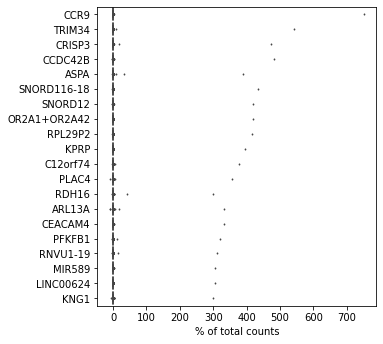

In [ ]:
sc.pl.highest_expr_genes(Pancreas_adata, n_top=20, )

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


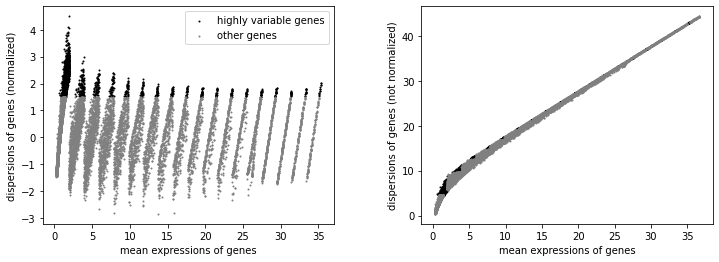

In [ ]:
sc.pp.highly_variable_genes(Pancreas_adata,n_top_genes=2000)
sc.pl.highly_variable_genes(Pancreas_adata)

In [ ]:
Pancreas_input = Pancreas_adata[:,Pancreas_adata.var['highly_variable']]
Pancreas_input

View of AnnData object with n_obs × n_vars = 2209 × 2000
    obs: 'Cell Type'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'

In [ ]:
# sc.pp.scale(Pancreas_adata)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class VariationalAutoencoder(Model):
    def __init__(self, num_cell_types, num_genes, reg_penalties):
        super(VariationalAutoencoder, self).__init__()  
        self.reg_penalties = reg_penalties
        self.mean_encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='linear', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer),
        ])
        self.var_encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='linear', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(num_genes, activation='linear', 
                      kernel_regularizer=self.decoder_marker_gene_regularizer)
        ])

    def reparameterization(self, mean, var):
        epsilon = tf.random.normal(shape = [mean.shape[1]])             
        z = mean + (var*epsilon)                       
        return z
        
    def call(self, x):
        mean = self.mean_encoder(x)
        log_var = self.var_encoder(x)
        z = self.reparameterization(mean, tf.exp(0.5 * log_var))
        p = tf.keras.activations.softmax(z)
        decoded = self.decoder(p)
        return decoded

    def embed(self, x):
        mean = self.mean_encoder(x)
        log_var = self.var_encoder(x)
        var = tf.exp(0.5 * log_var)
        return tf.keras.activations.softmax(mean), mean, var

    def encoder_marker_gene_regularizer(self, w):
        return tf.reduce_sum(self.reg_penalties * tf.square(w))

    def decoder_marker_gene_regularizer(self, w):
        return tf.reduce_sum(self.reg_penalties.T * tf.square(w))

In [ ]:
class Autoencoder(Model):
    def __init__(self, num_cell_types, num_genes, reg_penalties):
        super(Autoencoder, self).__init__()  
        self.reg_penalties = reg_penalties
        self.encoder = tf.keras.Sequential([
         layers.Dense(num_cell_types, activation='softmax', 
                      kernel_regularizer=self.encoder_marker_gene_regularizer),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(num_genes, activation='linear', 
                      kernel_regularizer=self.decoder_marker_gene_regularizer)
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def embed(self, x):
      encoded = self.encoder(x)
      return encoded

    def encoder_marker_gene_regularizer(self, w):
      return tf.reduce_sum(self.reg_penalties * tf.square(w))

    def decoder_marker_gene_regularizer(self, w):
      return tf.reduce_sum(self.reg_penalties.T * tf.square(w))

In [ ]:
# Creating regularization mask 

RegLevel = 0

marker_genes = Pancreas_input.var_names
cell_types = Pancreas_adata.obs['Cell Type'].unique()

marker_gene_cell_type_reg_penalties = np.ones((len(marker_genes), len(cell_types))) * RegLevel
marker_gene_cell_type_reg_penalties.shape

(2000, 14)

In [ ]:
NumPancreasCellTypes = len(Pancreas_adata.obs['Cell Type'].unique())
num_genes = Pancreas_input.shape[1]
autoencoder = VariationalAutoencoder(NumPancreasCellTypes, num_genes, 
                                    marker_gene_cell_type_reg_penalties)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                    loss=losses.MeanSquaredError())
history = autoencoder.fit(Pancreas_input.X, Pancreas_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(Pancreas_input.X, Pancreas_input.X))

Epoch 1/25
70/70 [==============================] - 3s 19ms/step - loss: 331.0573 - val_loss: 324.5681
Epoch 2/25
70/70 [==============================] - 1s 13ms/step - loss: 318.5824 - val_loss: 312.3290
Epoch 3/25
70/70 [==============================] - 1s 13ms/step - loss: 306.5599 - val_loss: 300.5317
Epoch 4/25
70/70 [==============================] - 1s 13ms/step - loss: 294.9683 - val_loss: 289.1541
Epoch 5/25
70/70 [==============================] - 1s 13ms/step - loss: 283.7869 - val_loss: 278.1772
Epoch 6/25
70/70 [==============================] - 1s 13ms/step - loss: 272.9977 - val_loss: 267.5835
Epoch 7/25
70/70 [==============================] - 1s 15ms/step - loss: 262.5837 - val_loss: 257.3569
Epoch 8/25
70/70 [==============================] - 1s 14ms/step - loss: 252.5296 - val_loss: 247.4828
Epoch 9/25
70/70 [==============================] - 1s 12ms/step - loss: 242.8211 - val_loss: 237.9472
Epoch 10/25
70/70 [==============================] - 1s 20ms/step - loss:

Text(0.5, 0, 'Epochs')

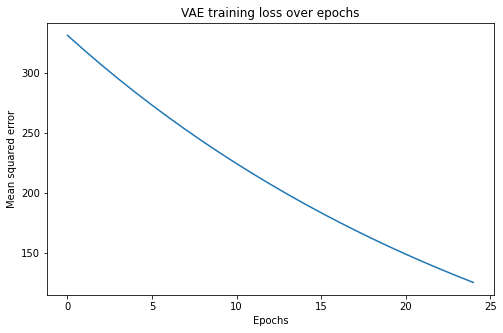

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('VAE training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [ ]:
def Compute_tTest(mean1,var1,mean2,var2,n):
  tScore = (mean1-mean2) / math.sqrt((var1+var2)/n)
  DegFreedom = ((((var1**2)+(var2**2))/n)**2) / ((((var1**2)+(var2**2))/(n**2))/(n-1))
  return scipy.stats.t.sf(abs(tScore), df=DegFreedom)

In [ ]:
latent_embedding, mean, var = autoencoder.embed(Pancreas_input.X)

cell_type_labels  = []
for item in latent_embedding:
  cell_type_labels.append(str(np.where(item == max(item))[0][0]))

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
# NumPancreasCells = Pancreas_input.shape[0]
# Pancreas_Assignment_PValues = []
# pVal_Threshold = 10

# for cell in range(NumPancreasCells):
#     MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
#     pVal = []
#     for LatentNode in range(NumPancreasCellTypes):
#       if LatentNode != MaxIndex:
#         pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
#                                    mean[cell,LatentNode],var[cell,LatentNode],
#                                    num_genes))
#     Pancreas_Assignment_PValues.append(pVal[np.argmax(pVal)])
#     if pVal[np.argmax(pVal)] > pVal_Threshold:
#       print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
#       cell_type_labels[cell] = 'Unknown'

# Pancreas_Assignment_PValues = np.array(Pancreas_Assignment_PValues).ravel()
# Pancreas_adata.obs['Pancreas pVal'] = Pancreas_Assignment_PValues

Pancreas_adata.obs['VAE Predicted Cell Type'] = cell_type_labels

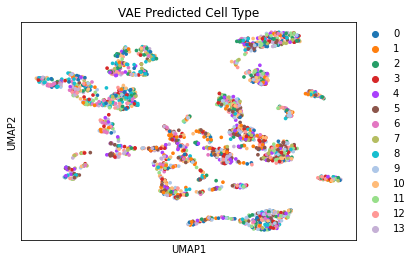

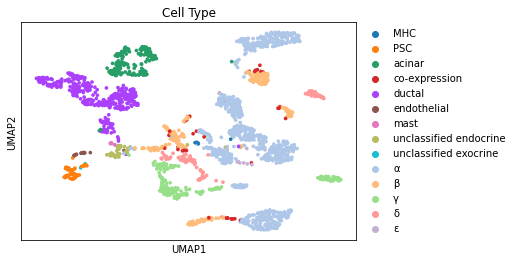

In [ ]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

sc.pl.umap(Pancreas_adata, color=['VAE Predicted Cell Type'])
sc.pl.umap(Pancreas_adata, color=['Cell Type'])

In [ ]:
NumPancreasCellTypes = len(Pancreas_adata.obs['Cell Type'].unique())
num_genes = Pancreas_input.shape[1]
autoencoder = Autoencoder(NumPancreasCellTypes, num_genes, 
                          marker_gene_cell_type_reg_penalties)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                    loss=losses.MeanSquaredError())
history = autoencoder.fit(Pancreas_input.X, Pancreas_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(Pancreas_input.X, Pancreas_input.X))

Epoch 1/25
70/70 [==============================] - 1s 9ms/step - loss: 219.4110 - val_loss: 215.1055
Epoch 2/25
70/70 [==============================] - 0s 6ms/step - loss: 211.1345 - val_loss: 206.9861
Epoch 3/25
70/70 [==============================] - 0s 6ms/step - loss: 203.1592 - val_loss: 199.1606
Epoch 4/25
70/70 [==============================] - 0s 6ms/step - loss: 195.4707 - val_loss: 191.6146
Epoch 5/25
70/70 [==============================] - 0s 6ms/step - loss: 188.0553 - val_loss: 184.3353
Epoch 6/25
70/70 [==============================] - 0s 6ms/step - loss: 180.9007 - val_loss: 177.3109
Epoch 7/25
70/70 [==============================] - 0s 6ms/step - loss: 173.9959 - val_loss: 170.5308
Epoch 8/25
70/70 [==============================] - 0s 6ms/step - loss: 167.3306 - val_loss: 163.9851
Epoch 9/25
70/70 [==============================] - 0s 6ms/step - loss: 160.8951 - val_loss: 157.6646
Epoch 10/25
70/70 [==============================] - 0s 6ms/step - loss: 154.6805 

In [ ]:
latent_embedding = autoencoder.embed(Pancreas_input.X)

cell_type_labels  = []
for item in latent_embedding:
  cell_type_labels.append(str(np.where(item == max(item))[0][0]))

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
# NumPancreasCells = Pancreas_input.shape[0]
# Pancreas_Assignment_PValues = []
# pVal_Threshold = 10

# for cell in range(NumPancreasCells):
#     MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
#     pVal = []
#     for LatentNode in range(NumPancreasCellTypes):
#       if LatentNode != MaxIndex:
#         pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
#                                    mean[cell,LatentNode],var[cell,LatentNode],
#                                    num_genes))
#     Pancreas_Assignment_PValues.append(pVal[np.argmax(pVal)])
#     if pVal[np.argmax(pVal)] > pVal_Threshold:
#       print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
#       cell_type_labels[cell] = 'Unknown'

# Pancreas_Assignment_PValues = np.array(Pancreas_Assignment_PValues).ravel()
# Pancreas_adata.obs['Pancreas pVal'] = Pancreas_Assignment_PValues

Pancreas_adata.obs['AE Predicted Cell Type'] = cell_type_labels

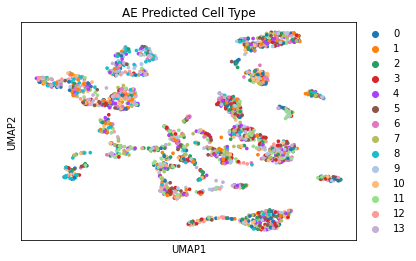

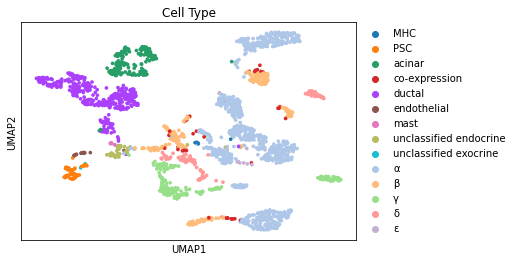

In [ ]:
sc.tl.pca(Pancreas_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(Pancreas_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(Pancreas_adata)

sc.pl.umap(Pancreas_adata, color=['AE Predicted Cell Type'])
sc.pl.umap(Pancreas_adata, color=['Cell Type'])

In [1]:
# Read and process GBM data 

GBM_adata = sc.read_text("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/GBM_LogX.txt", delimiter = '\t', first_column_names=None)
GBM_adata = GBM_adata.T 

GBMCellCycleScores = pd.read_table("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/GbmCellCycleScores.txt", delimiter = '\t')
GBM_adata.obs['score_S'] = GBMCellCycleScores['score_S'].values
GBM_adata.obs['score_G2M'] = GBMCellCycleScores['score_G2M'].values
sc.pp.regress_out(GBM_adata, ['score_S', 'score_G2M'])

# find 2000 HVGs
sc.pp.highly_variable_genes(GBM_adata,n_top_genes=2000)

# Scale (zero-center) data
sc.pp.scale(GBM_adata)

GBM_Metadata = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/metadata2.csv")
GBM_adata.obs['Cell Type'] = GBM_Metadata['cell_assignment'].values

GBMGenes = pd.read_csv("/content/drive/My Drive/ML for genomics project group /Data/GBM Data/Processed/features2.tsv",header=None)
GBMGenelist = []
for item in GBMGenes.values.tolist():
  GBMGenelist.append(item[0])
GBM_adata.var_names = GBMGenelist
GBM_adata.var_names

NameError: ignored

In [ ]:
GBM_input = GBM_adata[:,GBM_adata.var['highly_variable']]
GBM_input

View of AnnData object with n_obs × n_vars = 7930 × 2000
    obs: 'score_S', 'score_G2M', 'Cell Type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'

In [ ]:
# Creating regularization mask 

marker_genes = GBM_input.var_names
cell_types = GBM_adata.obs['Cell Type'].unique()

marker_gene_cell_type_reg_penalties = np.ones((len(marker_genes), len(cell_types))) * RegLevel
marker_gene_cell_type_reg_penalties.shape

(2000, 4)

In [ ]:
NumGBMCellTypes = len(GBM_adata.obs['Cell Type'].unique())
num_genes = GBM_input.shape[1]
autoencoder = VariationalAutoencoder(NumGBMCellTypes, num_genes, 
                                    marker_gene_cell_type_reg_penalties)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                    loss=losses.MeanSquaredError())
history = autoencoder.fit(GBM_input.X, GBM_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(GBM_input.X, GBM_input.X))

Epoch 1/25
248/248 [==============================] - 3s 9ms/step - loss: 91.1104 - val_loss: 85.0710
Epoch 2/25
248/248 [==============================] - 1s 5ms/step - loss: 79.5764 - val_loss: 74.2558
Epoch 3/25
248/248 [==============================] - 1s 5ms/step - loss: 69.4032 - val_loss: 64.7004
Epoch 4/25
248/248 [==============================] - 2s 6ms/step - loss: 60.4062 - val_loss: 56.2431
Epoch 5/25
248/248 [==============================] - 2s 6ms/step - loss: 52.4403 - val_loss: 48.7536
Epoch 6/25
248/248 [==============================] - 1s 5ms/step - loss: 45.3868 - val_loss: 42.1235
Epoch 7/25
248/248 [==============================] - 2s 7ms/step - loss: 39.1457 - val_loss: 36.2609
Epoch 8/25
248/248 [==============================] - 2s 6ms/step - loss: 33.6315 - val_loss: 31.0861
Epoch 9/25
248/248 [==============================] - 2s 7ms/step - loss: 28.7700 - val_loss: 26.5299
Epoch 10/25
248/248 [==============================] - 1s 6ms/step - loss: 24.4959

Text(0.5, 0, 'Epochs')

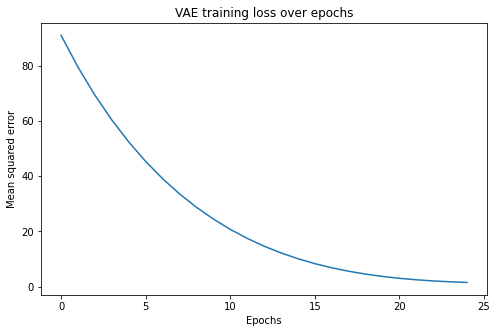

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('VAE training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [ ]:
latent_embedding, mean, var = autoencoder.embed(GBM_input.X)

cell_type_labels  = []
for item in latent_embedding:
  cell_type_labels.append(str(np.where(item == max(item))[0][0]))

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
# NumGBMCells = GBM_input.shape[0]
# GBM_Assignment_PValues = []
# pVal_Threshold = 10

# for cell in range(NumGBMCells):
#     MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
#     pVal = []
#     for LatentNode in range(NumGBMCellTypes):
#       if LatentNode != MaxIndex:
#         pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
#                                    mean[cell,LatentNode],var[cell,LatentNode],
#                                    num_genes))
#     GBM_Assignment_PValues.append(pVal[np.argmax(pVal)])
#     if pVal[np.argmax(pVal)] > pVal_Threshold:
#       print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
#       cell_type_labels[cell] = 'Unknown'

# GBM_Assignment_PValues = np.array(GBM_Assignment_PValues).ravel()
# GBM_adata.obs['GBM pVal'] = GBM_Assignment_PValues

GBM_adata.obs['VAE Predicted Cell Type'] = cell_type_labels

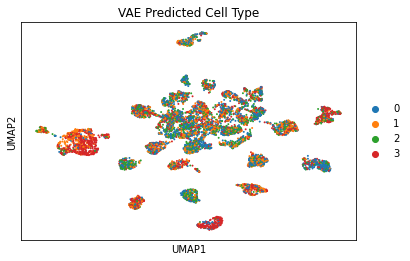

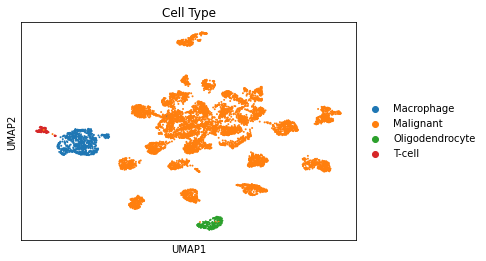

In [ ]:
sc.tl.pca(GBM_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(GBM_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(GBM_adata)

sc.pl.umap(GBM_adata, color=['VAE Predicted Cell Type'])
sc.pl.umap(GBM_adata, color=['Cell Type'])

In [ ]:
NumGBMCellTypes = len(GBM_adata.obs['Cell Type'].unique())
num_genes = GBM_input.shape[1]
autoencoder = Autoencoder(NumGBMCellTypes, num_genes, 
                          marker_gene_cell_type_reg_penalties)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                    loss=losses.MeanSquaredError())
history = autoencoder.fit(GBM_input.X, GBM_input.X,
                          epochs=25,
                          shuffle=True,
                          validation_data=(GBM_input.X, GBM_input.X))

Epoch 1/25
248/248 [==============================] - 2s 7ms/step - loss: 60.3059 - val_loss: 56.3220
Epoch 2/25
248/248 [==============================] - 2s 6ms/step - loss: 52.6998 - val_loss: 49.1933
Epoch 3/25
248/248 [==============================] - 2s 6ms/step - loss: 45.9971 - val_loss: 42.9004
Epoch 4/25
248/248 [==============================] - 1s 5ms/step - loss: 40.0744 - val_loss: 37.3352
Epoch 5/25
248/248 [==============================] - 1s 5ms/step - loss: 34.8343 - val_loss: 32.4101
Epoch 6/25
248/248 [==============================] - 2s 6ms/step - loss: 30.1971 - val_loss: 28.0525
Epoch 7/25
248/248 [==============================] - 1s 6ms/step - loss: 26.0958 - val_loss: 24.2004
Epoch 8/25
248/248 [==============================] - 1s 6ms/step - loss: 22.4731 - val_loss: 20.8009
Epoch 9/25
248/248 [==============================] - 1s 5ms/step - loss: 19.2795 - val_loss: 17.8079
Epoch 10/25
248/248 [==============================] - 1s 5ms/step - loss: 16.4716

Text(0.5, 0, 'Epochs')

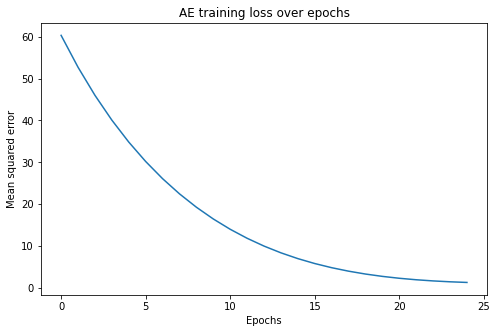

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.title('AE training loss over epochs')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs')

In [ ]:
latent_embedding = autoencoder.embed(GBM_input.X)

cell_type_labels  = []
for item in latent_embedding:
  cell_type_labels.append(str(np.where(item == max(item))[0][0]))

# compute pValue of each assignment and assign 'unknown' labels according p-value threshold
# NumGBMCells = GBM_input.shape[0]
# GBM_Assignment_PValues = []
# pVal_Threshold = 10

# for cell in range(NumGBMCells):
#     MaxIndex = tf.math.argmax(latent_embedding[cell,:]).numpy()
#     pVal = []
#     for LatentNode in range(NumGBMCellTypes):
#       if LatentNode != MaxIndex:
#         pVal.append(Compute_tTest(mean[cell,MaxIndex],var[cell,MaxIndex],
#                                    mean[cell,LatentNode],var[cell,LatentNode],
#                                    num_genes))
#     GBM_Assignment_PValues.append(pVal[np.argmax(pVal)])
#     if pVal[np.argmax(pVal)] > pVal_Threshold:
#       print('Not Confident: ' + cell_type_labels[cell] + ' = ' + str(pVal[np.argmax(pVal)]))
#       cell_type_labels[cell] = 'Unknown'

# GBM_Assignment_PValues = np.array(GBM_Assignment_PValues).ravel()
# GBM_adata.obs['GBM pVal'] = GBM_Assignment_PValues

GBM_adata.obs['AE Predicted Cell Type'] = cell_type_labels

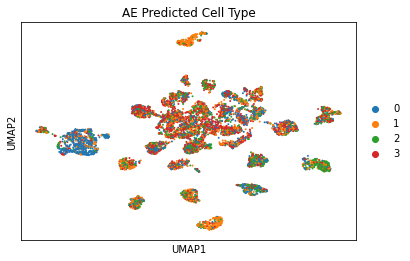

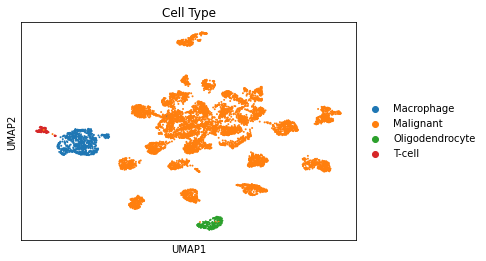

In [ ]:
sc.tl.pca(GBM_adata, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(GBM_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(GBM_adata)

sc.pl.umap(GBM_adata, color=['AE Predicted Cell Type'])
sc.pl.umap(GBM_adata, color=['Cell Type'])